In [ ]:
#@title 50_Startups

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
df=pd.read_csv('/content/50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
#@title Performing EDA

In [ ]:
df=df.drop('State',axis=1)

In [ ]:
df.head(8)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60


In [ ]:
df=df.rename({'R&D Spend':'RnD','Administration':'Adm','Marketing Spend':'MP'},axis=1)
df

,RnD,Adm,MP,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [ ]:
df.describe()

,RnD,Adm,MP,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RnD     50 non-null     float64
 1   Adm     50 non-null     float64
 2   MP      50 non-null     float64
 3   Profit  50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [ ]:
df.isnull().sum()

RnD       0
Adm       0
MP        0
Profit    0
dtype: int64

In [ ]:
df.isna().sum()

RnD       0
Adm       0
MP        0
Profit    0
dtype: int64

In [ ]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [ ]:
df[df.duplicated]

,RnD,Adm,MP,Profit


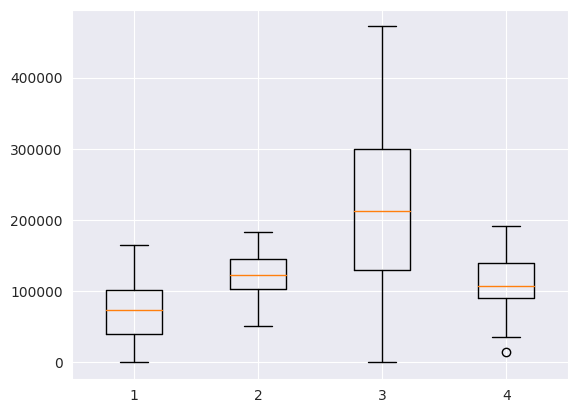

In [ ]:
plt.boxplot(df)
plt.show()

array([[<Axes: title={'center': 'RnD'}>, <Axes: title={'center': 'Adm'}>],
       [<Axes: title={'center': 'MP'}>,
        <Axes: title={'center': 'Profit'}>]], dtype=object)

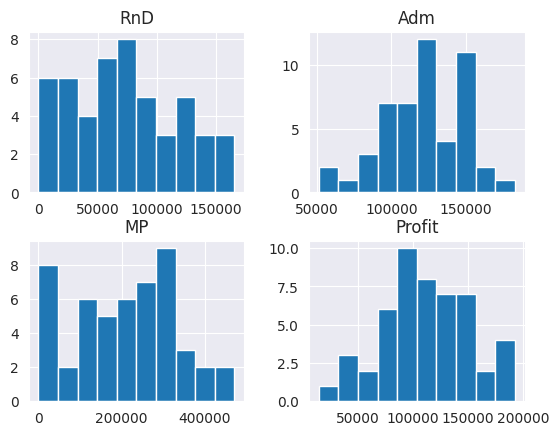

In [ ]:
df.hist()

In [ ]:
#corelation
df.corr()

,RnD,Adm,MP,Profit
RnD,1.000000,0.241955,0.724248,0.972900
Adm,0.241955,1.000000,-0.032154,0.200717
MP,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


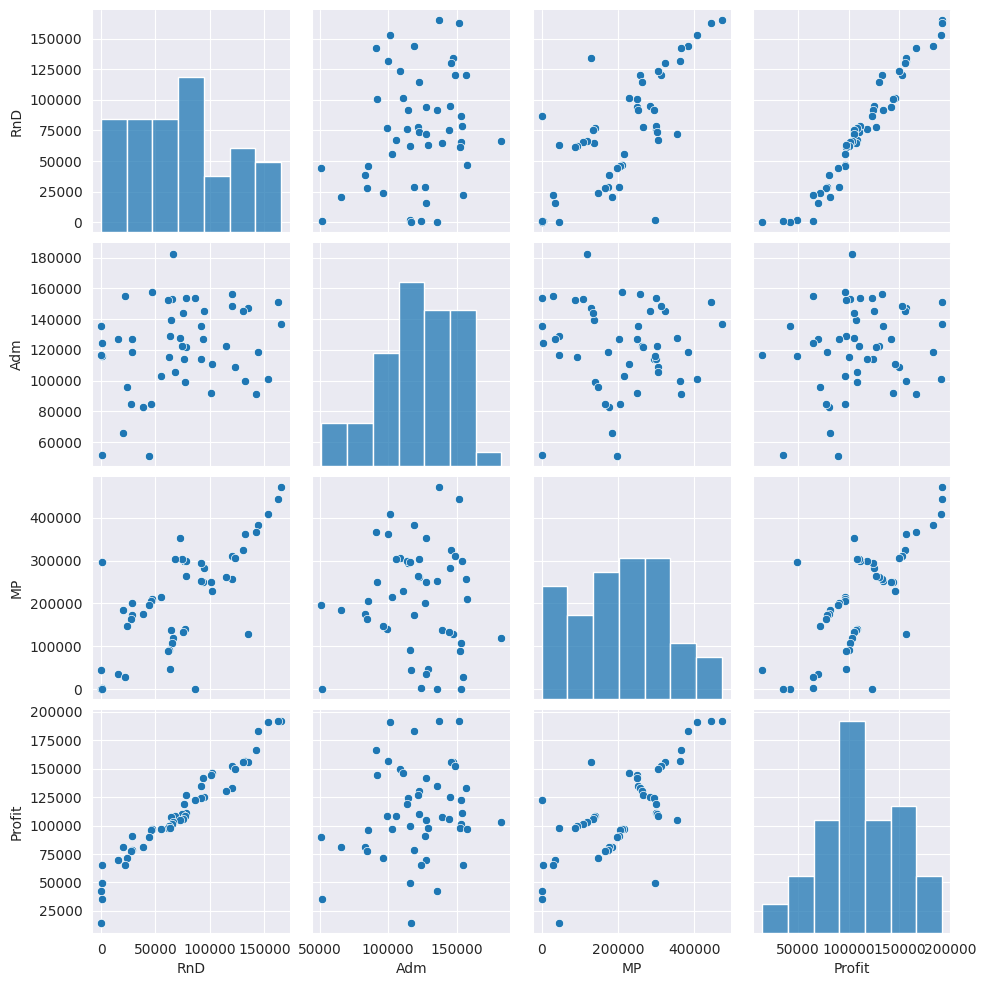

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [ ]:
#@title preparing model

In [ ]:
model=smf.ols('Profit~RnD+Adm+MP',data=df).fit()
model

In [ ]:
#model parameters
model.params

Intercept    50122.192990
RnD              0.805715
Adm             -0.026816
MP               0.027228
dtype: float64

In [ ]:
#t and p values
print(model.tvalues,'\n',model.pvalues)

Intercept     7.626218
RnD          17.846374
Adm          -0.525507
MP            1.655077
dtype: float64 
 Intercept    1.057379e-09
RnD          2.634968e-22
Adm          6.017551e-01
MP           1.047168e-01
dtype: float64


In [ ]:
print(model.rsquared,model.rsquared_adj)

0.9507459940683246 0.9475337762901719


In [ ]:
#simple linear model
p_rn=smf.ols('Profit~RnD',data=df).fit()
p_rn

#p and t values
print(p_rn.tvalues,'\n',p_rn.pvalues)

Intercept    19.320288
RnD          29.151139
dtype: float64 
 Intercept    2.782697e-24
RnD          3.500322e-32
dtype: float64


In [ ]:
print(p_rn.rsquared,p_rn.rsquared_adj)

0.9465353160804393 0.9454214684987817


In [ ]:
p_adm=smf.ols('Profit~Adm',data=df).fit()
p_adm

#p and t values
print(p_adm.tvalues,'\n',p_adm.pvalues)

Intercept    3.040044
Adm          1.419493
dtype: float64 
 Intercept    0.003824
Adm          0.162217
dtype: float64


In [ ]:
p_mp=smf.ols('Profit~MP',data=df).fit()
p_mp

#p and t values
print(p_mp.tvalues,'\n',p_mp.pvalues)

Intercept    7.808356
MP           7.802657
dtype: float64 
 Intercept    4.294735e-10
MP           4.381073e-10
dtype: float64


In [ ]:
p_am=smf.ols('Profit~Adm+MP',data=df).fit()
p_am

#p and t values
print(p_am.tvalues,'\n',p_am.pvalues)

Intercept    1.142741
Adm          2.467779
MP           8.281039
dtype: float64 
 Intercept    2.589341e-01
Adm          1.729198e-02
MP           9.727245e-11
dtype: float64


In [ ]:
print(p_am.rsquared,p_am.rsquared_adj)

0.6097229746770665 0.5931154416846012


In [ ]:
#Calculating VIF
rsq_rnd=smf.ols('RnD~Adm+MP',data=df).fit().rsquared
vif_rnd=1/(1-rsq_rnd)

rsq_adm=smf.ols('Adm~RnD+MP',data=df).fit().rsquared
vif_adm=1/(1-rsq_adm)

rsq_mp=smf.ols('MP~Adm+RnD',data=df).fit().rsquared
vif_mp=1/(1-rsq_mp)

d1={'Variables':['RnD','Adm','MP'],'VIF':[vif_rnd,vif_adm,vif_mp]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,RnD,2.468903
1,Adm,1.175091
2,MP,2.326773


In [ ]:
#AIC
import  statsmodels.formula.api as smf
model=smf.ols('Profit~RnD+Adm',data=df).fit()
print(model.rsquared,model.aic)


0.9478129385009173 1059.6636934567293


In [ ]:
model=smf.ols('Profit~MP+Adm',data=df).fit()
print(model.rsquared,model.aic)


0.6097229746770664 1160.2648038638672


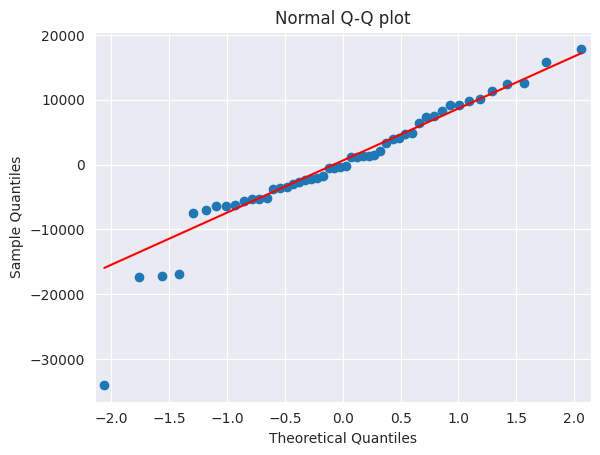

In [ ]:
#Normality check using Q-Q plot
import statsmodels.api as sm
model=smf.ols('Profit~RnD+Adm',data=df).fit()
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot')
plt.show()

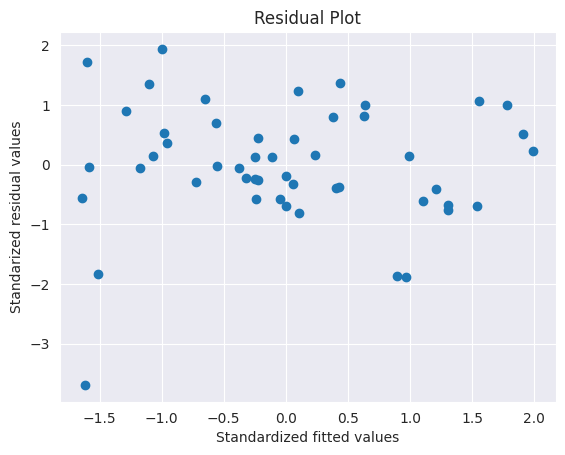

In [ ]:
#Residual Homosedasiticity
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standarized residual values')
plt.show()

eval_env: 1


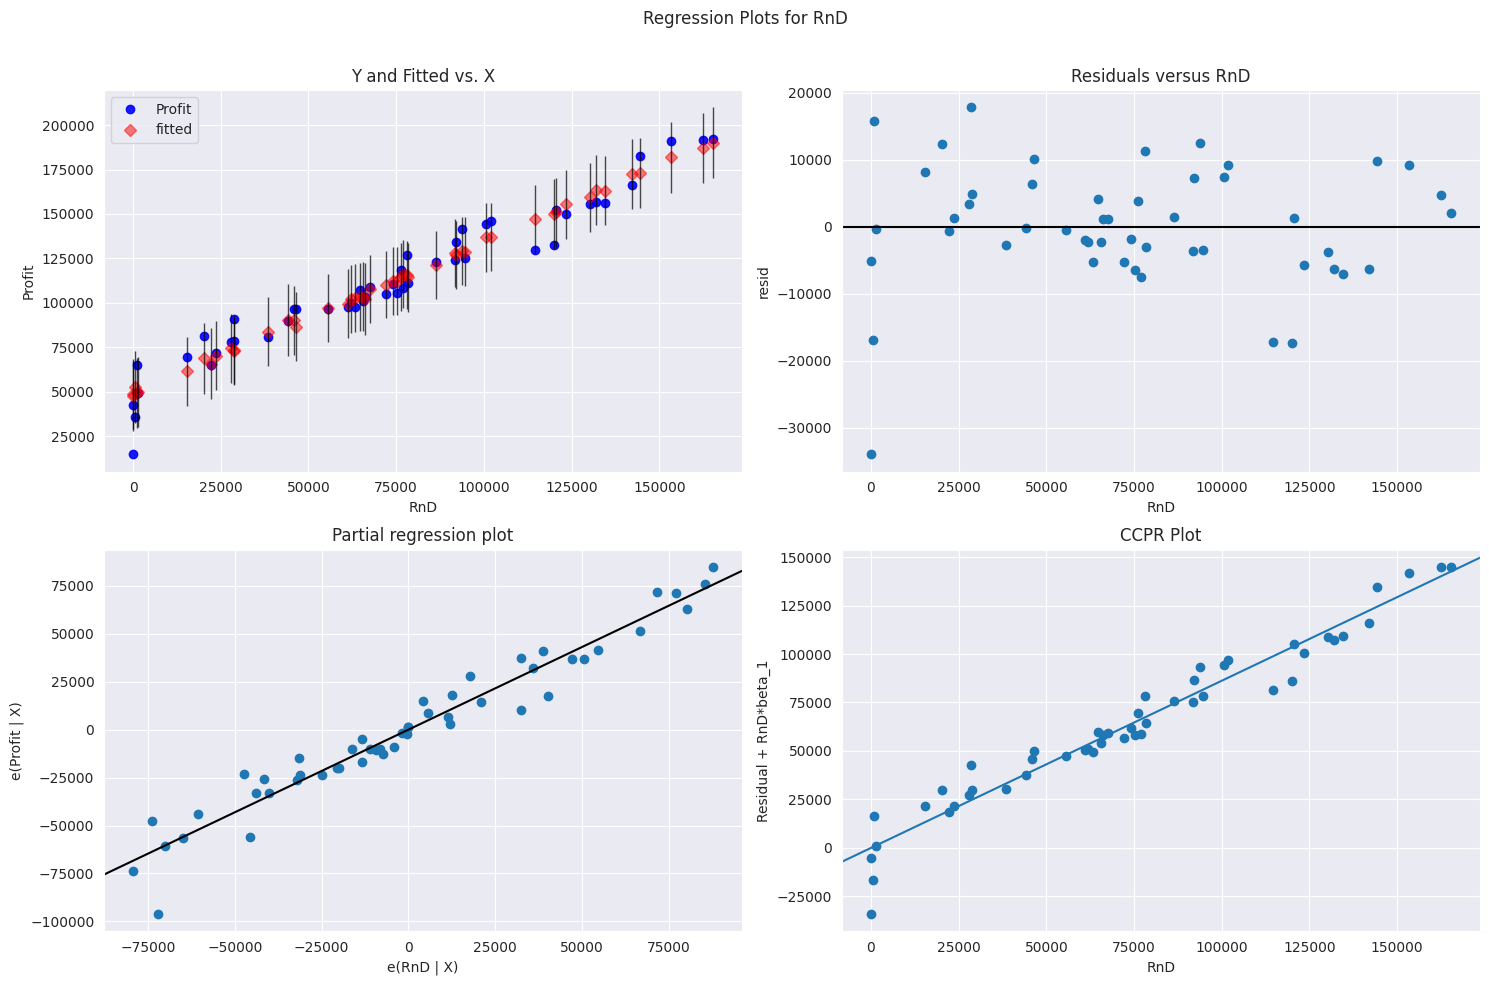

In [ ]:
#Residual vs Regressor
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'RnD',fig=fig)
plt.show()

eval_env: 1


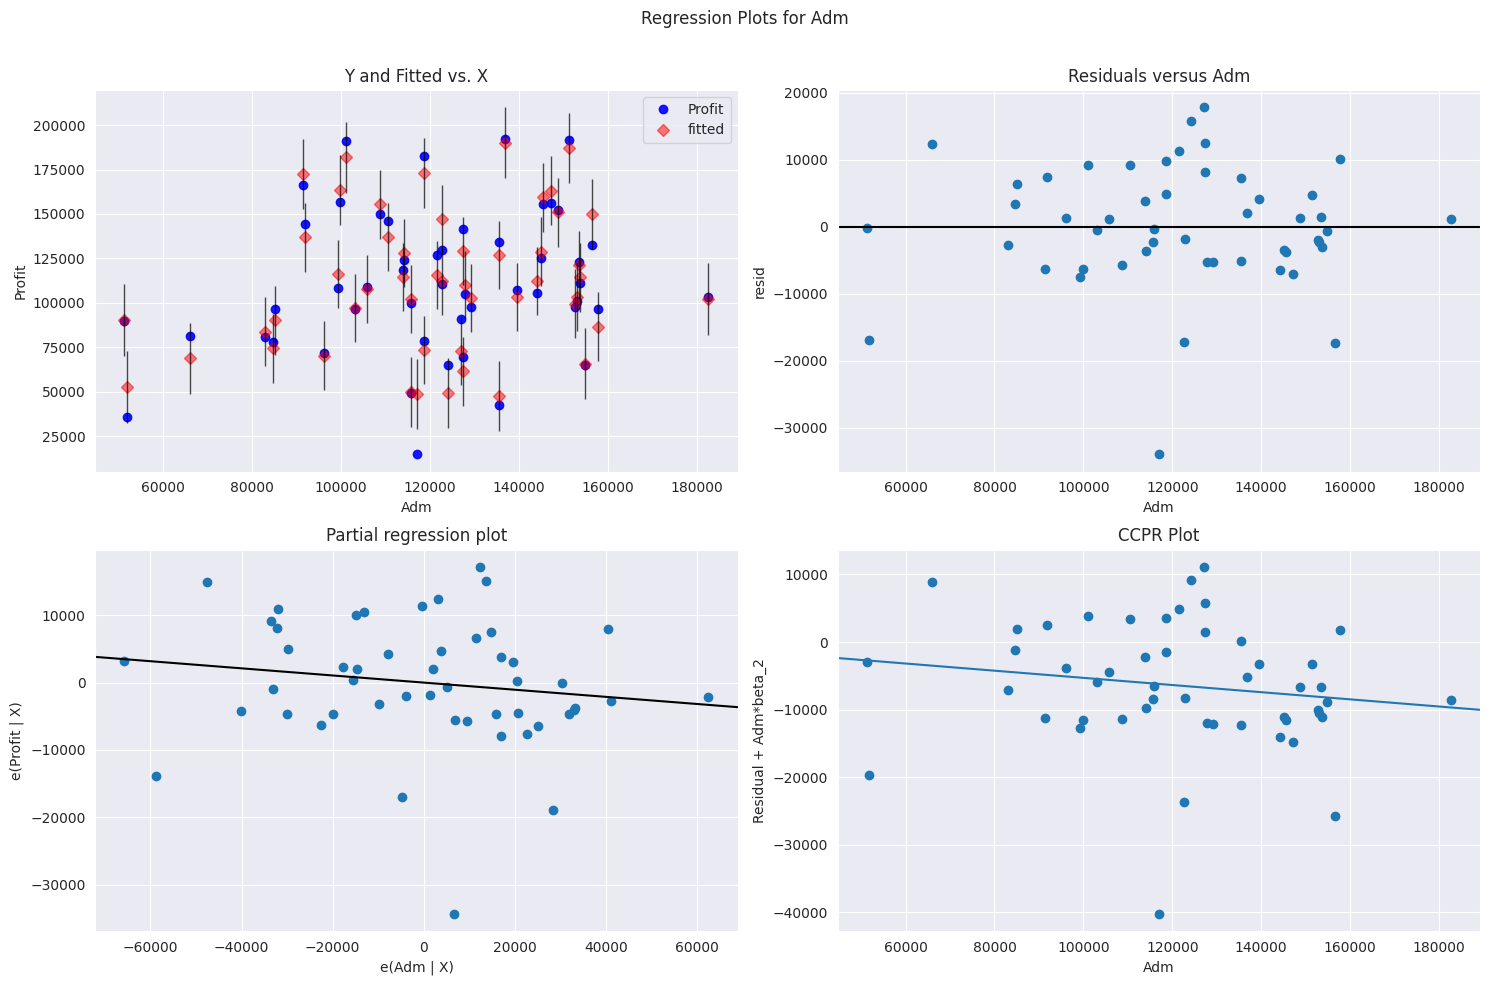

In [ ]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'Adm',fig=fig)
plt.show()

In [ ]:
#Model deletion diagnostics
#cooks distance
from statsmodels.graphics.regressionplots import influence_plot

model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

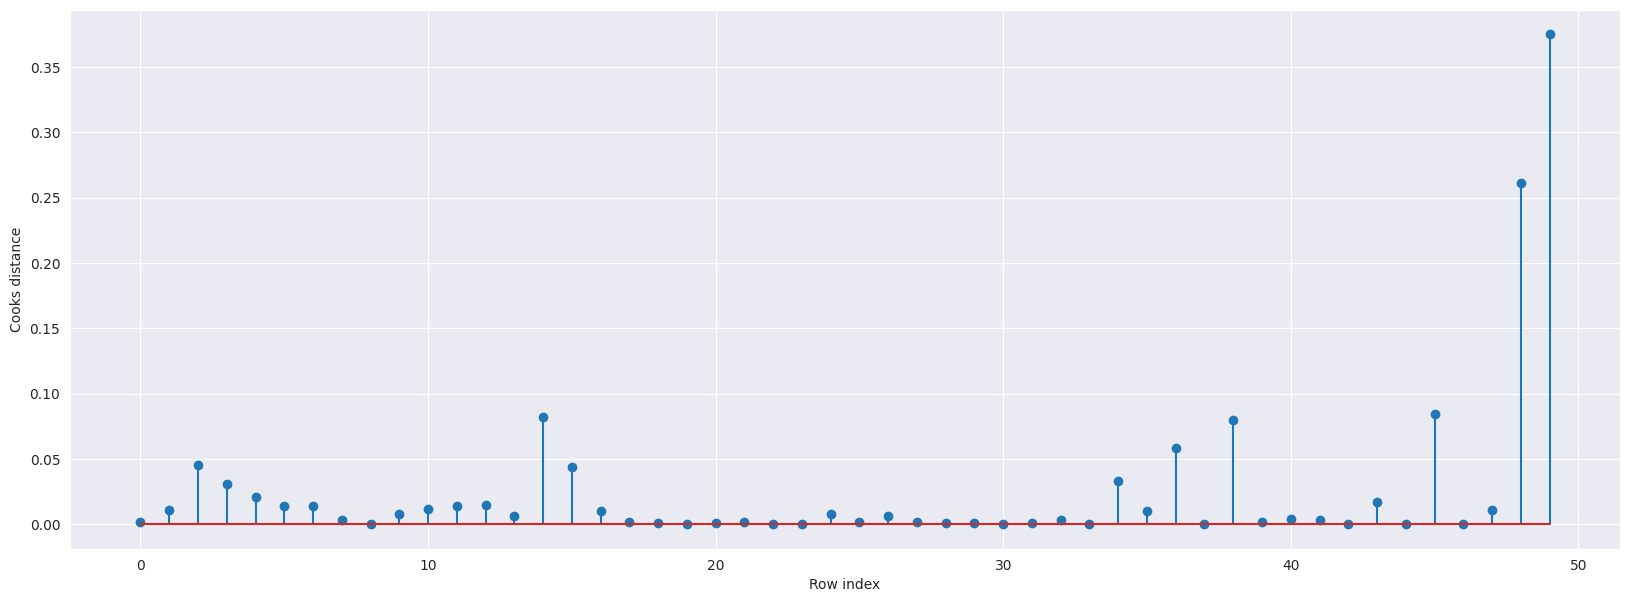

In [ ]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [ ]:
print(np.argmax(c),np.max(c))

49 0.375268146567758


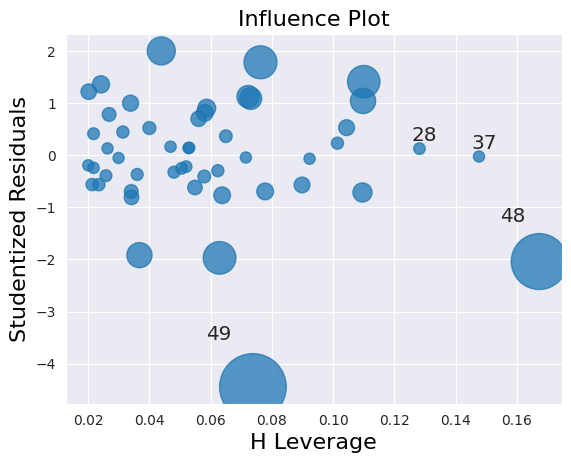

In [ ]:
#levarage plot
influence_plot(model,alpha=0.05)
plt.show()

In [ ]:
#prediction
new_df=pd.DataFrame({'RnD':162300,'Adm':167000,'MP':472000},index=[1])
new_df

,RnD,Adm,MP
1,162300,167000,472000


In [ ]:
model.predict(new_df)

1    185958.131287
dtype: float64

In [ ]:
print(model.rsquared,model.rsquared_adj)

0.9478129385009173 0.9455922124796797
